### Importing Libraries

In [38]:
import tensorflow as tf
import tensorflow.keras as keras
import tensorflow.keras.layers as layers
import numpy as np

# Preparing Data

### Downloading a dataset

In [ ]:
import wget
# training data
wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/horse-or-human.zip',
              out='data/horse-or-human.zip' )

#validation data
wget.download('https://storage.googleapis.com/laurencemoroney-blog.appspot.com/validation-horse-or-human.zip',
              out='data/validation-horse-or-human.zip')

### Extracting data from zip

In [8]:
import zipfile
# Training data
zipfile.ZipFile('data/horse-or-human.zip', mode='r').extractall(path='data/horse-or-human')

# Validation data
zipfile.ZipFile('data/validation-horse-or-human.zip', mode='r').extractall(path='data/validation-horse-or-human')

In [9]:
# deleting zip files
import os

os.remove('data/horse-or-human.zip')
os.remove('data/validation-horse-or-human.zip')

### Data preprocessing

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Image Augmentation
train_img_aug = ImageDataGenerator(
                                    rescale=1./255,
                                    rotation_range=20,
                                    width_shift_range=0.2,
                                    height_shift_range=0.2,
                                    horizontal_flip=True,
                                    shear_range=0.2,
                                    fill_mode='nearest',
                                    zoom_range=0.3
                                    )

# Image generator
train_generator = train_img_aug.flow_from_directory(
                                                    'data/horse-or-human',
                                                    target_size=(300,300),
                                                    class_mode='binary',
                                                    batch_size=128
                                                    )

# Same for validation data
val_img_aug = ImageDataGenerator(rescale=1./255.0)

validation_generator = val_img_aug.flow_from_directory(
                                                      'data/validation-horse-or-human',
                                                       target_size=(300,300),
                                                       class_mode='binary',
                                                       batch_size=32
                                                      )

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


# Model

In [9]:
# Building model
model = keras.Sequential([
                         layers.Conv2D(16, (3,3), input_shape=(300,300,3), activation='relu'),
                         layers.MaxPooling2D(2,2),
                         layers.Conv2D(32, (3,3), activation='relu'),
                         layers.MaxPooling2D(2,2),
                         layers.Conv2D(32, (3,3), activation='relu'),
                         layers.MaxPooling2D(2,2),
                         layers.Flatten(),                        
                         layers.Dense(512, activation='relu'),
                         layers.Dense(1, activation='sigmoid')
                         ])

In [10]:
# Compiling model

from tensorflow.keras.optimizers import RMSprop

model.compile(
             loss='binary_crossentropy',
             optimizer=RMSprop(learning_rate=0.001),
             metrics='accuracy')

model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 298, 298, 16)      448       
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 149, 149, 16)      0         
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 147, 147, 32)      4640      
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 73, 73, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 71, 71, 32)        9248      
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 35, 35, 32)        0         
_________________________________________________________________
flatten_1 (Flatten)          (None, 39200)            

In [11]:
# Fitting model
history = model.fit(
                    train_generator,
                    validation_data=validation_generator,
                    epochs=10,         # change this to more number and try
                    steps_per_epoch=8,
                    validation_steps=8,
                    verbose=1,
                   )

Epoch 1/10
8/8 [==============================] - 30s 4s/step - loss: 4.2291 - accuracy: 0.4928 - val_loss: 0.6205 - val_accuracy: 0.5352
Epoch 2/10
8/8 [==============================] - 38s 5s/step - loss: 0.6420 - accuracy: 0.6218 - val_loss: 2.1697 - val_accuracy: 0.5000
Epoch 3/10
8/8 [==============================] - 33s 4s/step - loss: 0.6767 - accuracy: 0.6719 - val_loss: 0.6472 - val_accuracy: 0.6289
Epoch 4/10
8/8 [==============================] - 30s 4s/step - loss: 0.7637 - accuracy: 0.7275 - val_loss: 0.9960 - val_accuracy: 0.5938
Epoch 5/10
8/8 [==============================] - 35s 4s/step - loss: 0.6514 - accuracy: 0.6885 - val_loss: 1.0122 - val_accuracy: 0.6016
Epoch 6/10
8/8 [==============================] - 30s 4s/step - loss: 0.4490 - accuracy: 0.7820 - val_loss: 1.2895 - val_accuracy: 0.5781
Epoch 7/10
8/8 [==============================] - 35s 4s/step - loss: 0.7780 - accuracy: 0.6796 - val_loss: 1.0433 - val_accuracy: 0.6055
Epoch 8/10
8/8 [==================

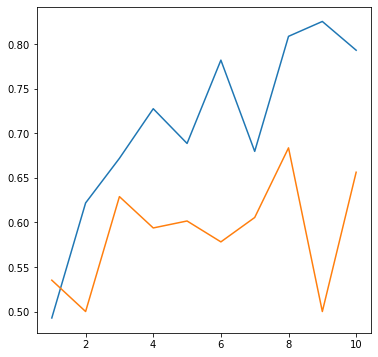

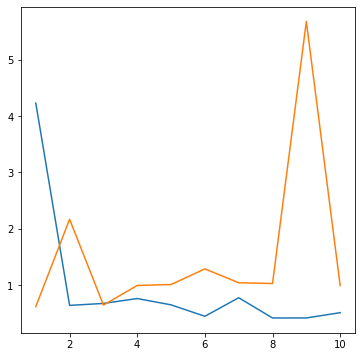

In [21]:
import matplotlib.pyplot as plt

epochs = 10   # change as per number of epochs

plt.figure(figsize=(6,6))
plt.plot(range(1,epochs+1), history.history['accuracy'] )
plt.plot(range(1,epochs+1), history.history['val_accuracy'])
plt.show()

plt.figure(figsize=(6,6))
plt.plot(range(1,epochs+1), history.history['loss'])
plt.plot(range(1,epochs+1), history.history['val_loss'])
plt.show()

### Prediction

In [133]:
import os
path = r'C:\Users\lenovo\Desktop\Python_Prg\Projects\projects\Machine_Vision_Horse_and_Human\Data\Evalute_horse_human'

full_path = []
for name in os.listdir(path):
    full_path.append(os.path.join(path, name))

In [136]:
from tensorflow.keras.preprocessing import image

images = np.zeros((len(full_path), 300, 300, 3))

for ind, f_path in enumerate(full_path):
    img = image.load_img(f_path, target_size=(300,300))
    x = image.img_to_array(img)
    x = x/255
    x = np.expand_dims(x, axis=0)
    images[ind] = np.vstack([x])
    
pred = model.predict(images)

for name, prob in zip(os.listdir(path), pred):    
    if prob>0.5:
        print(f'{name} is a human')
    else: 
        print(f'{name} is a horse')

Horse1.png is a horse
Horse2.jpg is a horse
Horse3.jpg is a human
Horse4.jpg is a horse
Horse5.jpg is a horse
human1.jpg is a human
human3.JPG is a human
human4.jfif is a human
human5.jpg is a human


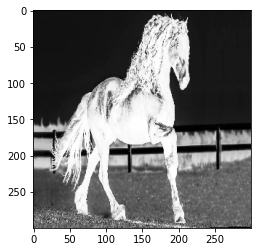

In [158]:
# image 3 is not corrected properly by the model
import matplotlib.image as mpimg
img = mpimg.imread(r'C:\Users\lenovo\Desktop\Python_Prg\Projects\projects\Machine_Vision_Horse_and_Human\Data\Evalute_horse_human\Horse3.jpg')
plt.imshow(images[2][:,:,1], cmap='Greys') # showing grey image
plt.show()

### If there is more data to train higher accuracy can be achived